In [4]:
import pandas as pd
df = pd.read_csv('/Users/ADMIN/Documents/sales_dw_project/staging/stg_sales_cleaned.csv', parse_dates=['Sale_Date'])

In [5]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [6]:
df.shape # số hàng, số cột

(1000, 14)

In [8]:
df.info() # kiểu dữ liệu , null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [9]:
df.describe() # mô tả thống kê cho numeric

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,2023-07-02 17:42:43.199999744,5019.265230,25.355000,2475.304550,2728.440120,0.15239
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2023-03-30 00:00:00,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,2023-06-30 12:00:00,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,2023-10-12 00:00:00,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,2024-01-01 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.30000
std,29.573505,NaN,2846.790126,14.159006,1417.872546,1419.399839,0.08720


In [10]:
# đếm null theo cột
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [12]:
# đêm số trùng lặp
df.duplicated().sum()

np.int64(0)

In [14]:
df[df.duplicated(['Product_ID','Sale_Date','Sales_Rep'])]

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
452,1054,2023-10-23,David,South,4392.47,48,Electronics,4325.02,4391.67,Returning,0.16,Credit Card,Retail,South-David
646,1058,2023-03-02,Eve,East,5463.43,49,Furniture,1307.22,1528.40,Returning,0.24,Cash,Retail,East-Eve
956,1052,2023-12-22,Charlie,West,2858.57,18,Food,1127.86,1586.29,New,0.04,Credit Card,Online,West-Charlie


In [16]:
for col in ['Product_ID','Sales_Rep','Region','Customer_Type','Sales_Channel','Payment_Method']:
    print(col, df[col].nunique())

Product_ID 100
Sales_Rep 5
Region 4
Customer_Type 2
Sales_Channel 2
Payment_Method 3


In [17]:
# kiểm tra ngày bất thường
df['Sale_Date'].min()
df['Sale_Date'].max()

Timestamp('2024-01-01 00:00:00')

In [19]:
# giá < 0
df[df['Unit_Cost']<0]

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep


In [20]:
# số lượng đã bán<0
df[df['Quantity_Sold']<0]

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep


In [21]:
df[df['Unit_Price']<df['Unit_Cost']]

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep


In [25]:
df.mean(numeric_only=True)

Product_ID       1050.12800
Sales_Amount     5019.26523
Quantity_Sold      25.35500
Unit_Cost        2475.30455
Unit_Price       2728.44012
Discount            0.15239
dtype: float64

In [26]:
df.max(numeric_only=True)

Product_ID       1100.00
Sales_Amount     9989.04
Quantity_Sold      49.00
Unit_Cost        4995.30
Unit_Price       5442.15
Discount            0.30
dtype: float64

In [27]:
df.min(numeric_only=True)

Product_ID       1001.00
Sales_Amount      100.12
Quantity_Sold       1.00
Unit_Cost          60.28
Unit_Price        167.12
Discount            0.00
dtype: float64

Text(0.5, 1.0, 'Boxplot Unit_Price')

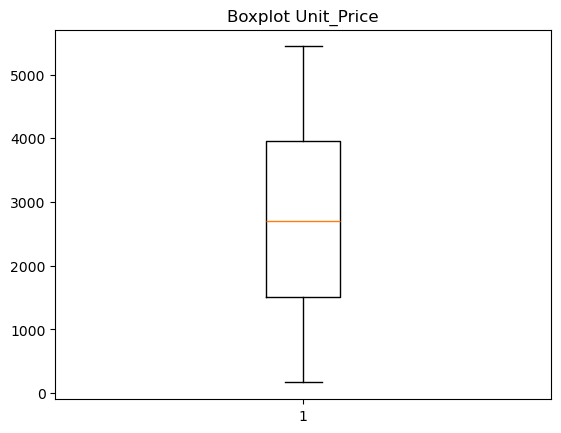

In [28]:
# Boxplot để phát hiện outliers
import matplotlib.pyplot as plt
plt.boxplot(df['Unit_Price'])
plt.title('Boxplot Unit_Price')

<Axes: xlabel='Discount', ylabel='Quantity_Sold'>

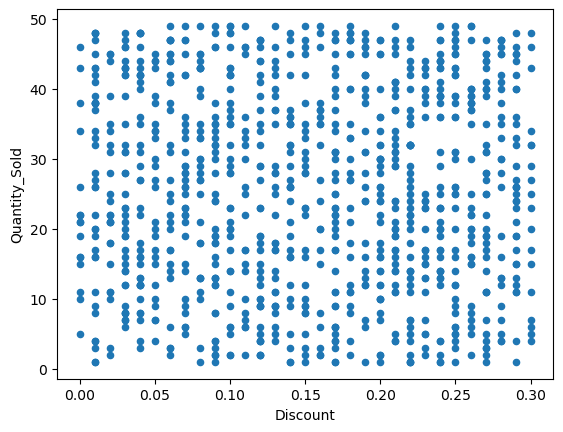

In [29]:
df.plot.scatter('Discount','Quantity_Sold')